In [4]:
import tensorflow as tf
import numpy as np
import random
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

### NN for MNIST

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Cost = 158.703898744
Epoch: 0002 Cost = 38.958855700
Epoch: 0003 Cost = 23.941824499
Epoch: 0004 Cost = 16.649136921
Epoch: 0005 Cost = 12.083894674
Epoch: 0006 Cost = 8.895873140
Epoch: 0007 Cost = 6.720665525
Epoch: 0008 Cost = 4.939698422
Epoch: 0009 Cost = 3.765803841
Epoch: 0010 Cost = 2.865051300
Epoch: 0011 Cost = 2.197929080
Epoch: 0012 Cost = 1.622566787
Epoch: 0013 Cost = 1.199940983
Epoch: 0014 Cost = 0.950252560
Epoch: 0015 Cost = 0.727803949
Learning finished!
Accuracy: 0.9426
Label: [5]
Prediction: [5]


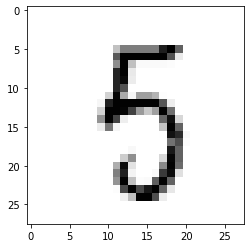

In [6]:
# input
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# NN model
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# training
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        feed_dict = {X: batch_xs, Y: batch_ys}
        
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'Cost =', '{:.9f}'.format(avg_cost))
    
print('Learning finished!')

# test accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))

# show the image
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

### Xavier for MNIST

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Epoch: 0001 Cost = 0.318791488
Epoch: 0002 Cost = 0.119250719
Epoch: 0003 Cost = 0.076968447
Epoch: 0004 Cost = 0.056476981
Epoch: 0005 Cost = 0.041509209
Epoch: 0006 Cost = 0.033068594
Epoch: 0007 Cost = 0.024980155
Epoch: 0008 Cost = 0.020949545
Epoch: 0009 Cost = 0.017977988
Epoch: 0010 Cost = 0.013776198
Epoch: 0011 Cost = 0.011575734
Epoch: 0012 Cost = 0.010513941
Epoch: 0013 Cost = 0.014248821
Epoch: 0014 Cost = 0.010845855
Epoch: 0

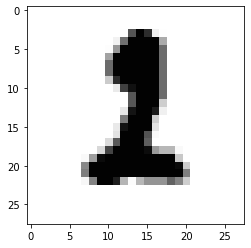

In [7]:
# input
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# NN model
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# training
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        feed_dict = {X: batch_xs, Y: batch_ys}
        
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'Cost =', '{:.9f}'.format(avg_cost))
    
print('Learning finished!')

# test accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))

# show the image
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

> normal dist로 했을 때와 비교했을 때, Xavier는 처음부터 cost가 낮음 -> 초기값이 잘 적용되었다는 것

### Deep NN for MNIST

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Cost = 0.294653674
Epoch: 0002 Cost = 0.107485182
Epoch: 0003 Cost = 0.072570262
Epoch: 0004 Cost = 0.053060758
Epoch: 0005 Cost = 0.041414362
Epoch: 0006 Cost = 0.036696058
Epoch: 0007 Cost = 0.029373592
Epoch: 0008 Cost = 0.028983483
Epoch: 0009 Cost = 0.023756157
Epoch: 0010 Cost = 0.021727809
Epoch: 0011 Cost = 0.018766653
Epoch: 0012 Cost = 0.016576186
Epoch: 0013 Cost = 0.018725824
Epoch: 0014 Cost = 0.017664824
Epoch: 0015 Cost = 0.012195049
Learning finished!
Accuracy: 0.9775
Label: [0]
Prediction: [0]


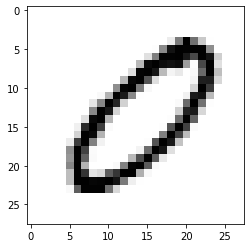

In [11]:
# input
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# NN model
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1_1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2_1", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3_1", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4_1", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5_1", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# training
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        feed_dict = {X: batch_xs, Y: batch_ys}
        
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'Cost =', '{:.9f}'.format(avg_cost))
    
print('Learning finished!')

# test accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))

# show the image
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

> 깊은데 왜 이전보다 낮음? -> Overfitting

### Dropout for MNIST (Overfit 막기)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch: 0001 Cost = 0.411413011
Epoch: 0002 Cost = 0.189611892
Epoch: 0003 Cost = 0.141474554
Epoch: 0004 Cost = 0.118088440
Epoch: 0005 Cost = 0.102266117
Epoch: 0006 Cost = 0.090225492
Epoch: 0007 Cost = 0.079828378
Epoch: 0008 Cost = 0.072582365
Epoch: 0009 Cost = 0.065718572
Epoch: 0010 Cost = 0.061734431
Epoch: 0011 Cost = 0.056360240
Epoch: 0012 Cost = 0.051957280
Epoch: 0013 Cost = 0.047414670
Epoch: 0014 Cost = 0.044515807
Epoch: 0015 Cost = 0.042741220
Learning finished!
Accuracy: 0.9824
Label: [1]
Prediction: [1]


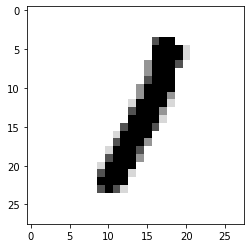

In [13]:
# input
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# NN model
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1_2", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2_2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L1, keep_prob=keep_prob)

W3 = tf.get_variable("W3_2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L1, keep_prob=keep_prob)

W4 = tf.get_variable("W4_2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L1, keep_prob=keep_prob)

W5 = tf.get_variable("W5_2", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# training
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'Cost =', '{:.9f}'.format(avg_cost))
    
print('Learning finished!')

# test accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1], keep_prob: 1}))

# show the image
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()